## Assignment on Random Forest - Regression algorithm - Predict if the client will subscribe (yes/no) a term deposit using Portuguese bank marketing dataset - 07/03

### import necessary interfaces

In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
os.chdir(r'C:\Users\kalya\Santhosh\Data Science\Notebook\Preprocessing')

### Read Portugues bank marketing dataset. Downloaded this file from Kaggle

In [8]:
data = pd.read_csv('Portuguese_bank_marketing.csv', sep = ';')

In [9]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
data.shape

(45211, 17)

In [12]:
data.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [13]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
data.duplicated().sum()

0

### Preprocessing

In [16]:
data.dtypes[data.dtypes == 'object']

job          object
marital      object
education    object
default      object
housing      object
loan         object
contact      object
month        object
poutcome     object
y            object
dtype: object

In [17]:
data.dtypes[data.dtypes == 'int64']

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [18]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [19]:
data.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [20]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [21]:
data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [22]:
data.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [23]:
data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [24]:
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [25]:
data.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [26]:
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [27]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [31]:
data1 = data
data1['default'] = data1['default'].replace({'yes':1, 'no':0}) 

In [32]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
data1['housing'] = data1['housing'].replace({'yes':1, 'no':0}) 

In [35]:
data1['loan'] = data1['loan'].replace({'yes':1, 'no':0}) 

In [36]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
data1.dtypes

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [38]:
data.dtypes[data.dtypes == 'object']

job          object
marital      object
education    object
contact      object
month        object
poutcome     object
y            object
dtype: object

In [39]:
data_filter_category = pd.get_dummies(data1.drop(columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']))

In [41]:
data1.dtypes[data.dtypes == 'int64']

age         int64
default     int64
balance     int64
housing     int64
loan        int64
day         int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [42]:
data_preprocessed = pd.concat([data_filter_category, data1.drop(columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'])],axis=1)

In [44]:
data_preprocessed.dtypes

age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y_no         uint8
y_yes        uint8
age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y           object
dtype: object

In [45]:
data_preprocessed = data_preprocessed.drop(columns = ['y_no', 'y_yes'])

In [46]:
data_preprocessed.dtypes

age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y           object
dtype: object

In [59]:
data_preprocessed.shape

(45211, 21)

### Modelling

In [47]:
X = data_preprocessed.drop(columns = 'y')

In [91]:
y = data_preprocessed[['y']]

In [49]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,58,0,2143,1,0,5,261,1,-1,0,58,0,2143,1,0,5,261,1,-1,0
1,44,0,29,1,0,5,151,1,-1,0,44,0,29,1,0,5,151,1,-1,0
2,33,0,2,1,1,5,76,1,-1,0,33,0,2,1,1,5,76,1,-1,0
3,47,0,1506,1,0,5,92,1,-1,0,47,0,1506,1,0,5,92,1,-1,0
4,33,0,1,0,0,5,198,1,-1,0,33,0,1,0,0,5,198,1,-1,0


In [103]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [92]:
y.value_counts()

y  
no     39922
yes     5289
dtype: int64

In [82]:
X.shape, y.shape

((45211, 20), (45211, 1))

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [93]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [70]:
model_DC = DecisionTreeClassifier(criterion = 'entropy')

In [94]:
model_DC.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [72]:
model_RFC = RandomForestClassifier()

In [95]:
model_RFC.fit(X,y)

C:\Users\kalya\AppData\Local\Temp/ipykernel_37388/449578458.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RFC.fit(X,y)


RandomForestClassifier()

<AxesSubplot:>

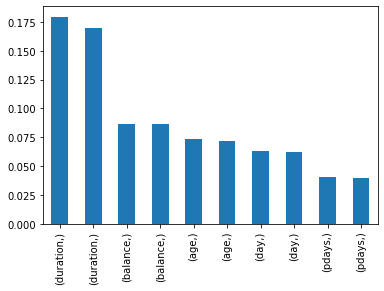

In [96]:
pd.Series(model_RFC.feature_importances_, index = [X.columns]).sort_values(ascending=False)[:10].plot(kind = 'bar')

In [87]:
def rmsle(y_true, y_pred):
    return 1 - np.sqrt(np.square(np.log10(y_pred + 1) - np.log10(y_true + 1)).mean())

In [97]:
train_pred = model_RFC.predict(train_X)
test_pred = model_RFC.predict(test_X)


In [98]:
from sklearn.metrics import accuracy_score

In [99]:
accuracy_score(train_y,train_pred)

1.0

In [100]:
accuracy_score(test_y,test_pred)

1.0

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [107]:
print('Confusion matrix : \n', confusion_matrix(train_y, train_pred))
print('Classification Report : \n', classification_report(train_y, train_pred))

Confusion matrix : 
 [[31913     0]
 [    0  4255]]
Classification Report : 
               precision    recall  f1-score   support

          no       1.00      1.00      1.00     31913
         yes       1.00      1.00      1.00      4255

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



In [106]:
print('Confusion matrix : \n', confusion_matrix(test_y, test_pred))
print('Classification Report : \n', classification_report(test_y, test_pred))

Confusion matrix : 
 [[8009    0]
 [   0 1034]]
Classification Report : 
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      8009
         yes       1.00      1.00      1.00      1034

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043

